# Postdam PM2.5 Traditional Forcasting

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [2]:
import model_base as mb
import traditional as td

## Data Exploration

* Load Data


In [3]:
df_hourly, df_daily, df_weekly, df_monthly = mb.read_date_freq()

# HOURLY 
mb.set_start_date_time_index(df_hourly)

# DAILY 
mb.set_start_date_time_index(df_daily)

# WEEKLY 
mb.set_start_date_time_index(df_weekly)

# MONTHLY 
mb.set_start_date_time_index(df_monthly)

# SARIMAX

# Model creation and Evolve

## Diagnose Fitted Model
* Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
* Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.
* Theoretical Quantiles: Mostly the dots fall not in line with the red line, deviations would imply the distribution is skewed.
* Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model.

## Residuals
Residual should have ~0 mean. If residual has other than zero, then forecasts are biased. Adjusting bias is easy: if residual mean is other than zero them simply add mean value to all forecast then bias problem solved. if forecast residuals that do not contain these characteristics have room for improvements. Adding additional terms to our ETS or ARIMA model may alleviate this issue.


Training set size: 52588
Validation set size: 17529
Test set size: 17531


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.


===== Summary ======
                               SARIMAX Results                                
Dep. Variable:            PM2.5-Value   No. Observations:                52588
Model:                        SARIMAX   Log Likelihood             -155391.143
Date:                Wed, 14 Feb 2024   AIC                         310800.286
Time:                        01:41:19   BIC                         310880.118
Sample:                    01-01-2013   HQIC                        310825.235
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NO2-Value      0.0375      0.001     29.787      0.000       0.035       0.040
O3-Value      -0.0549      0.000   -128.048      0.000      -0.056      -0.054
SO2-Value      1.2653      0.00

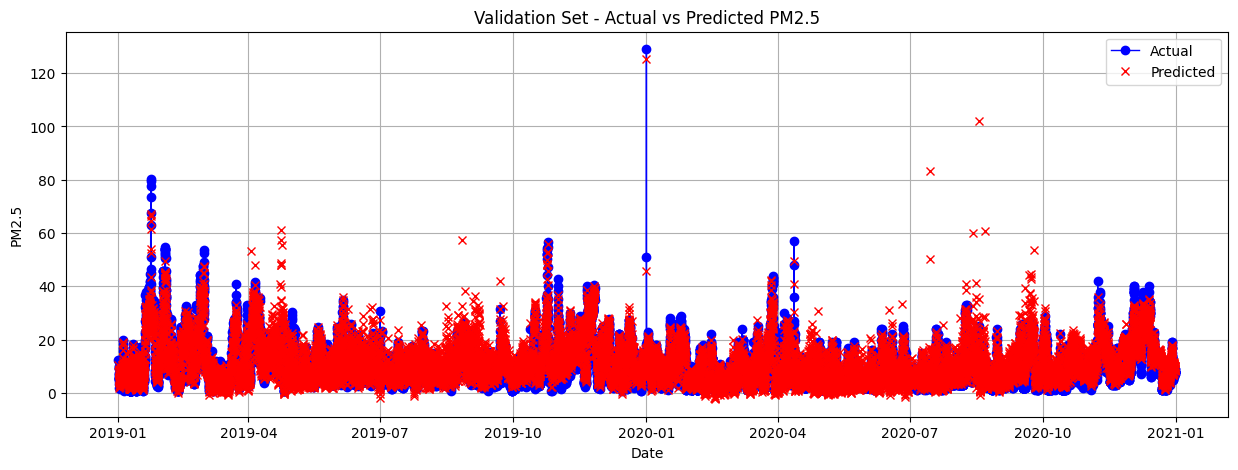

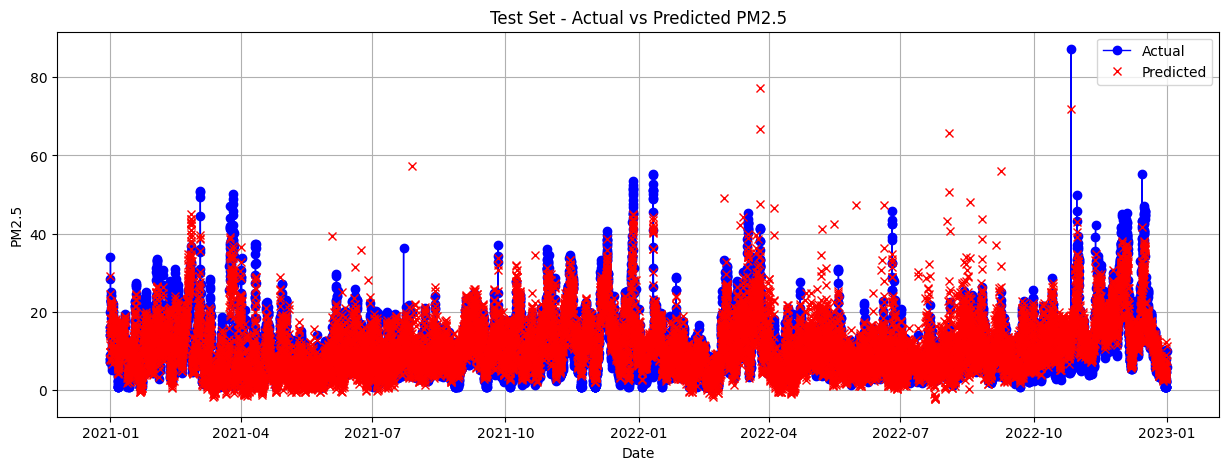

Model saved to sarimax_model_H.pkl


In [4]:
# HOURLY
td.sarimax_train_and_evolve(df_hourly)

Training set size: 2191
Validation set size: 730
Test set size: 731


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


===== Summary ======
                               SARIMAX Results                                
Dep. Variable:            PM2.5-Value   No. Observations:                 2191
Model:               SARIMAX(6, 0, 1)   Log Likelihood               -4767.221
Date:                Wed, 14 Feb 2024   AIC                           9566.443
Time:                        01:41:24   BIC                           9657.517
Sample:                    01-01-2013   HQIC                          9599.729
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NO2-Value     -0.0367      0.010     -3.746      0.000      -0.056      -0.018
O3-Value      -0.0559      0.004    -14.462      0.000      -0.064      -0.048
SO2-Value      0.6209      0.04

/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


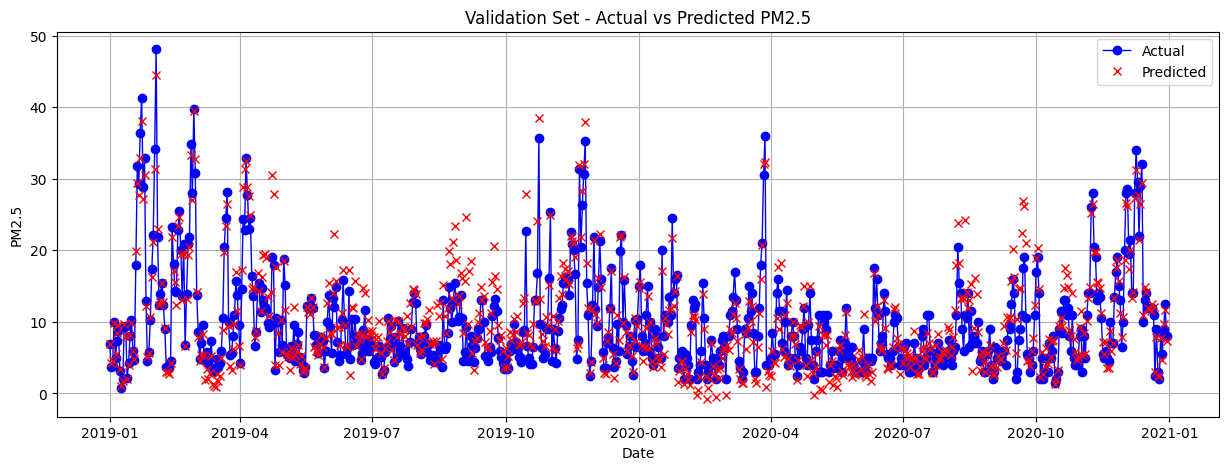

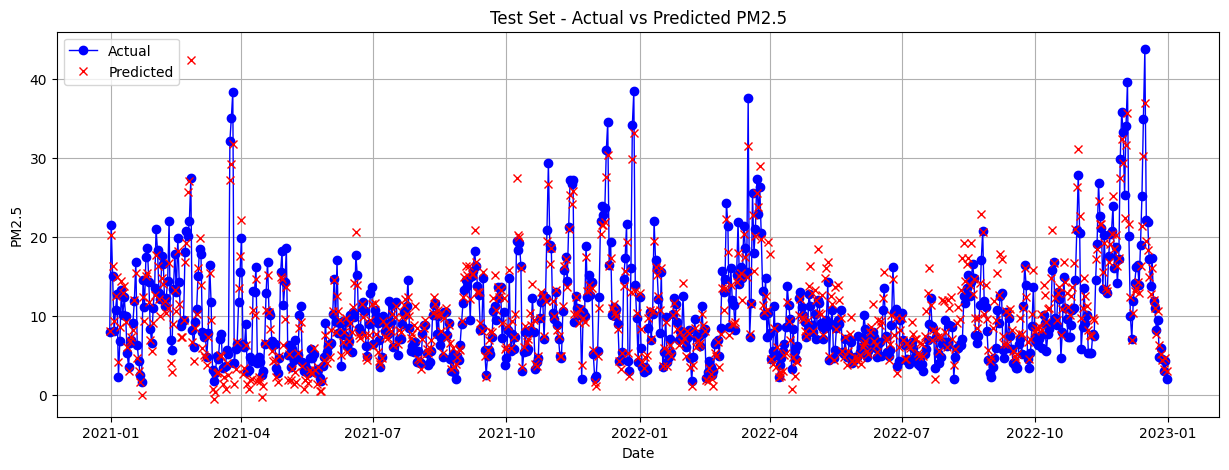

Model saved to sarimax_model_D.pkl


In [5]:
# DAILY
td.sarimax_train_and_evolve(df_daily, 'D')

Training set size: 313
Validation set size: 104
Test set size: 105


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


===== Summary ======
                               SARIMAX Results                                
Dep. Variable:            PM2.5-Value   No. Observations:                  313
Model:               SARIMAX(6, 0, 7)   Log Likelihood                -606.507
Date:                Wed, 14 Feb 2024   AIC                           1255.013
Time:                        01:41:25   BIC                           1333.683
Sample:                    01-06-2013   HQIC                          1286.452
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NO2-Value     -0.0282      0.021     -1.316      0.188      -0.070       0.014
O3-Value      -0.0814      0.006    -12.601      0.000      -0.094      -0.069
SO2-Value      0.7173      0.07

/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


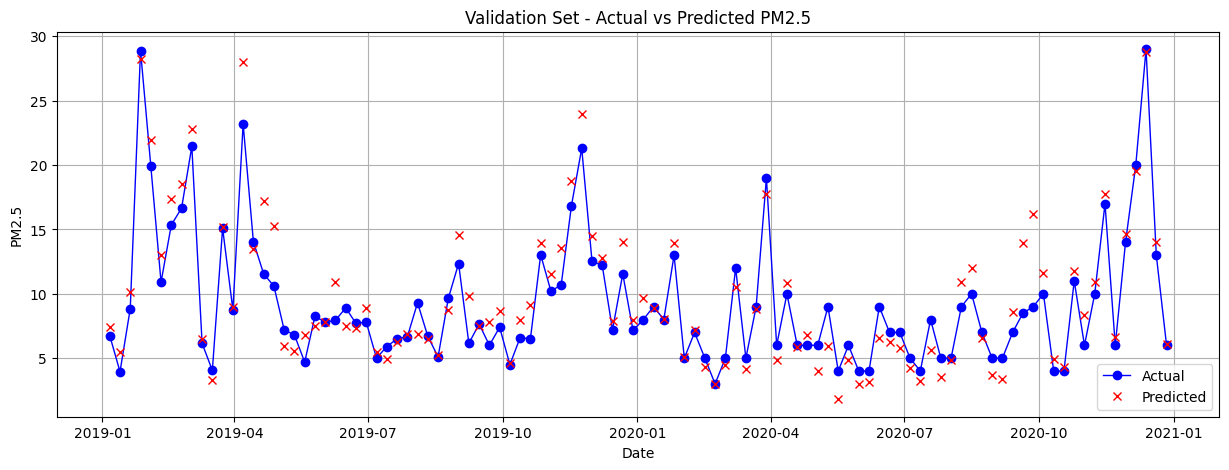

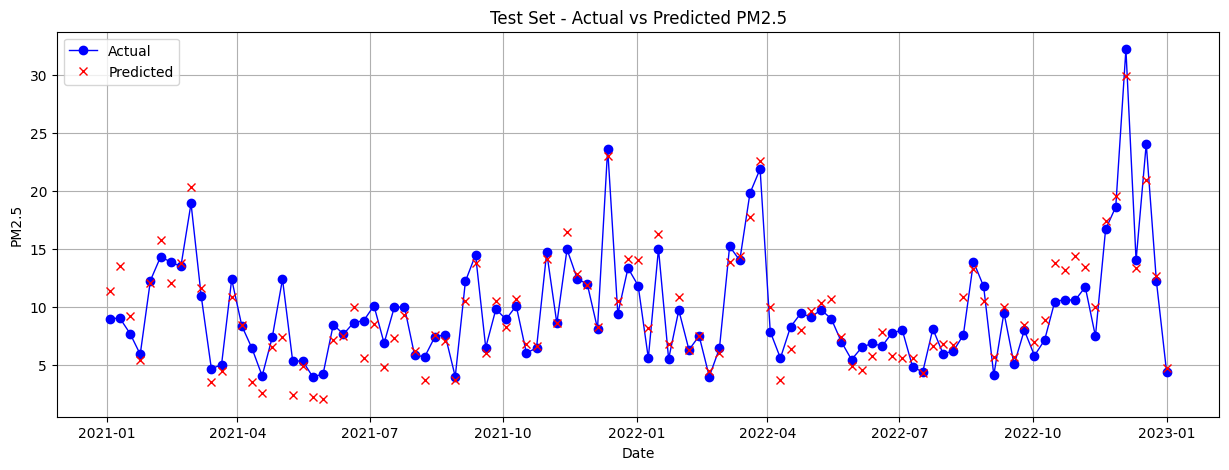

Model saved to sarimax_model_W.pkl


In [6]:
# WEEKLY
td.sarimax_train_and_evolve(df_weekly, 'W')

Training set size: 72
Validation set size: 24
Test set size: 24


/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


===== Summary ======
                               SARIMAX Results                                
Dep. Variable:            PM2.5-Value   No. Observations:                   72
Model:               SARIMAX(3, 0, 6)   Log Likelihood                -119.345
Date:                Wed, 14 Feb 2024   AIC                            272.690
Time:                        01:41:26   BIC                            311.393
Sample:                    01-31-2013   HQIC                           288.097
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NO2-Value     -0.0681      0.078     -0.868      0.385      -0.222       0.086
O3-Value      -0.1207      0.017     -7.072      0.000      -0.154      -0.087
SO2-Value      0.3940      0.17

/Users/tugcekonuklar/anaconda3/envs/irp-air-pollution/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


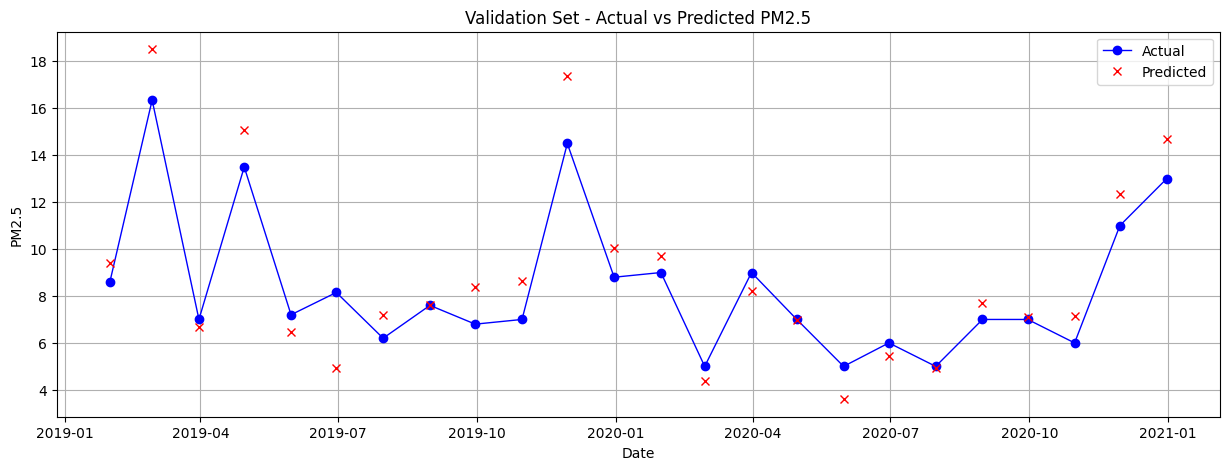

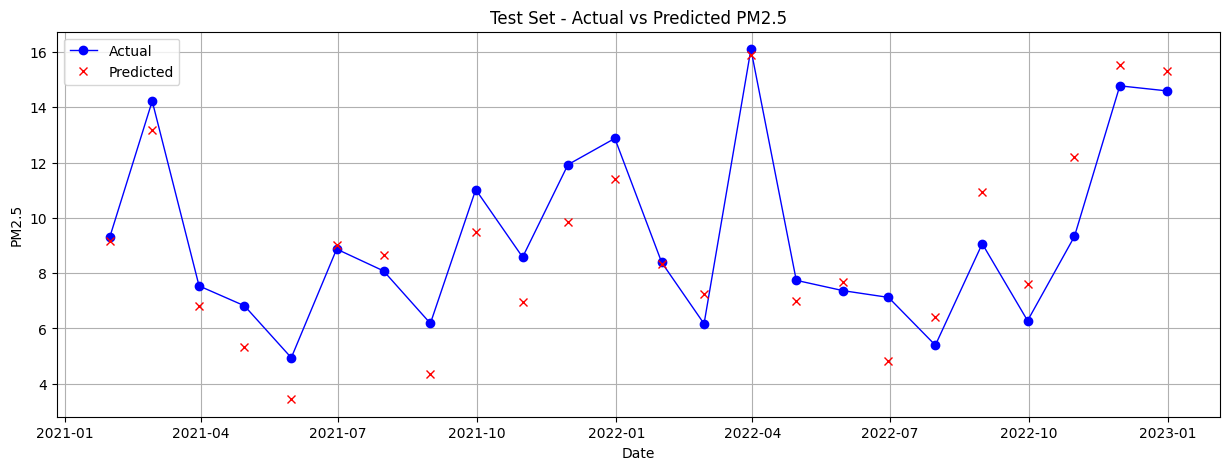

Model saved to sarimax_model_M.pkl


In [7]:
# MONTLY
td.sarimax_train_and_evolve(df_monthly, 'M')

## Timestamp Data Load 

In [8]:
df_hourly_ts, df_daily_ts, df_weekly_ts, df_monthly_ts = mb.read_timestamp_freq()

# HOURLY 
mb.set_start_time_index(df_hourly_ts)

# DAILY 
mb.set_start_time_index(df_daily_ts)

# WEEKLY 
mb.set_start_time_index(df_weekly_ts)

# MONTHLY 
mb.set_start_time_index(df_monthly_ts)

# Support Vector Regression (SVR) forecasting  

Training set size: 52588
Validation set size: 17529
Test set size: 17531
MAE: 1.7569
MSE: 9.3863
RMSE: 3.0637
MAPE: 0.2376
Bias: 0.9594
MASE: 1.695064521272621
MAE: 1.7923
MSE: 7.6795
RMSE: 2.7712
MAPE: 0.2271
Bias: 0.4440
MASE: 1.6593231932196995


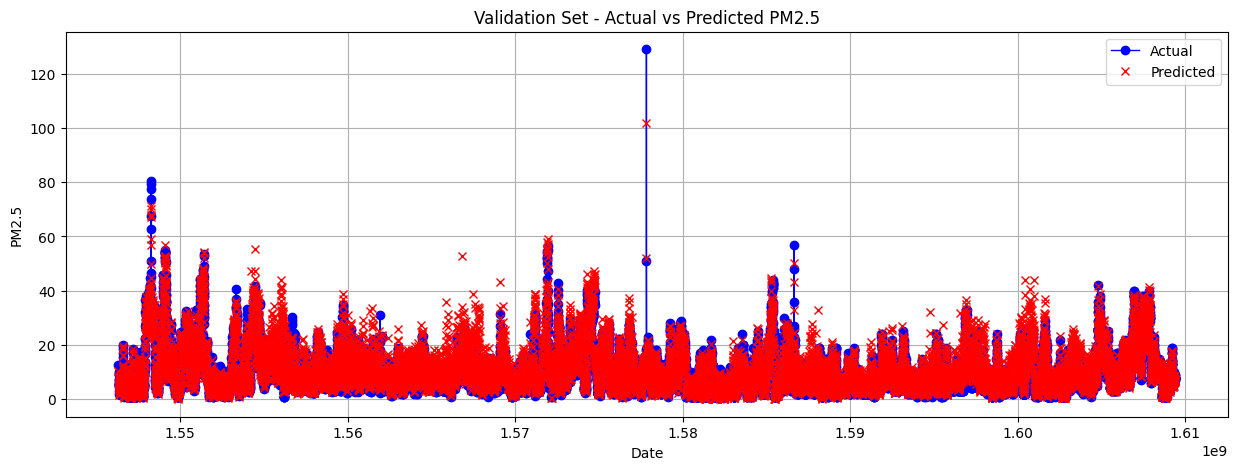

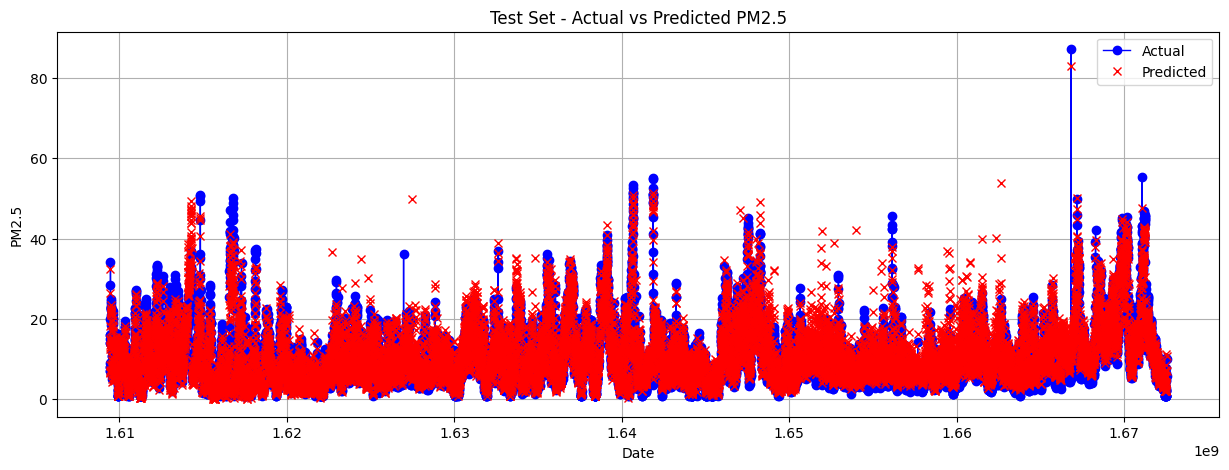

Model saved to svr_model_H.pkl
Training set size: 2191
Validation set size: 730
Test set size: 731
MAE: 1.8822
MSE: 7.6528
RMSE: 2.7664
MAPE: 0.2589
Bias: 0.7479
MASE: 0.5226410439691442
MAE: 1.8294
MSE: 5.8823
RMSE: 2.4253
MAPE: 0.2371
Bias: 0.2770
MASE: 0.5217088920561579


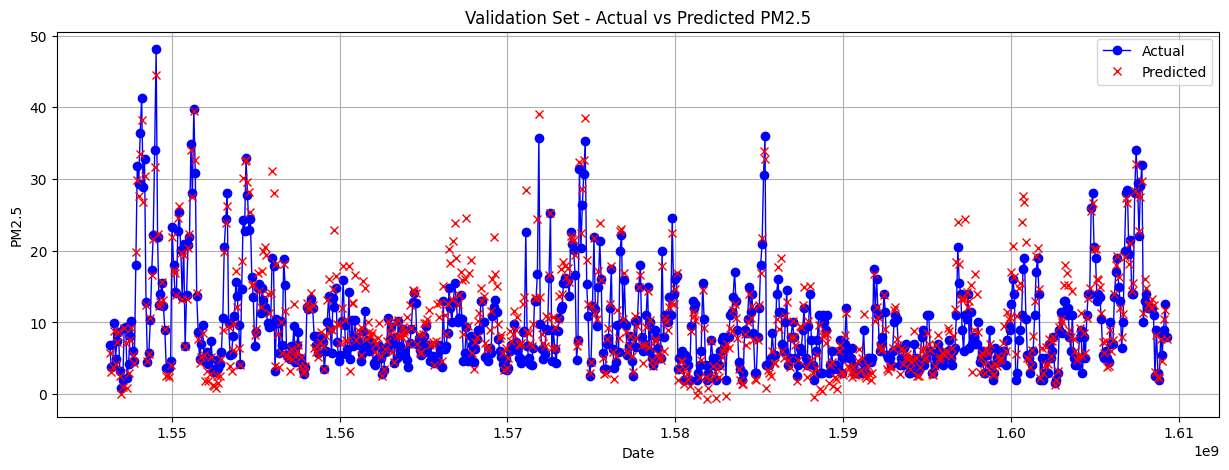

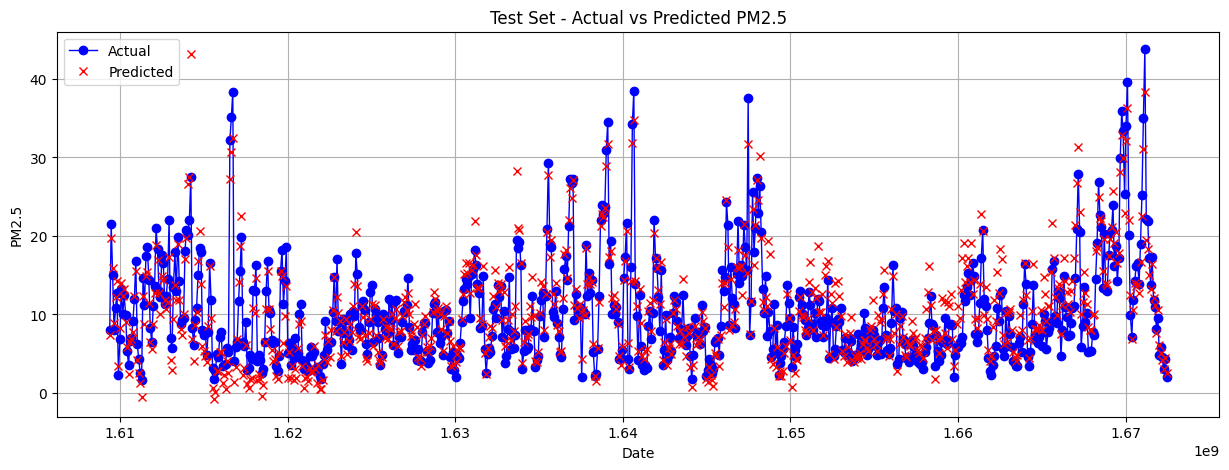

Model saved to svr_model_D.pkl
Training set size: 313
Validation set size: 104
Test set size: 105
MAE: 1.5473
MSE: 4.4265
RMSE: 2.1039
MAPE: 0.1925
Bias: 0.1964
MASE: 0.3877624687016735
MAE: 1.3815
MSE: 3.1669
RMSE: 1.7796
MAPE: 0.1637
Bias: -0.4379
MASE: 0.3675752515023086


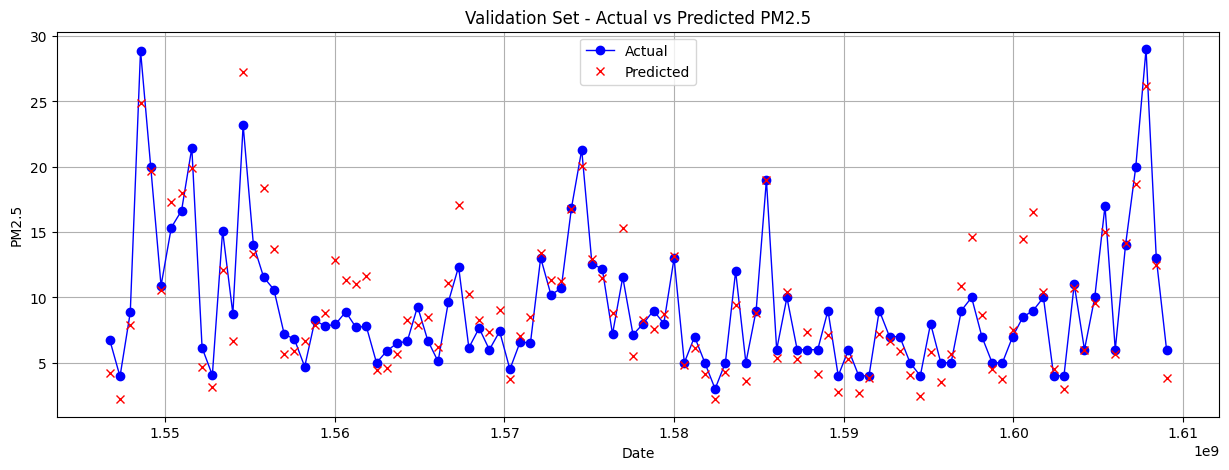

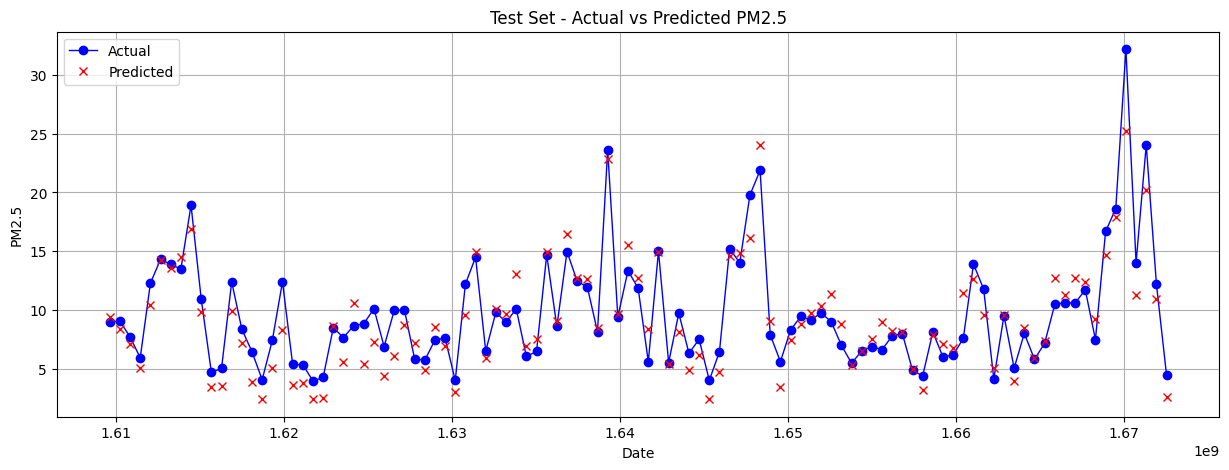

Model saved to svr_model_W.pkl
Training set size: 72
Validation set size: 24
Test set size: 24
MAE: 1.0408
MSE: 1.5442
RMSE: 1.2427
MAPE: 0.1384
Bias: 0.2056
MASE: 0.32974526604520493
MAE: 0.9661
MSE: 1.3041
RMSE: 1.1420
MAPE: 0.1209
Bias: -0.5230
MASE: 0.2966896165668196


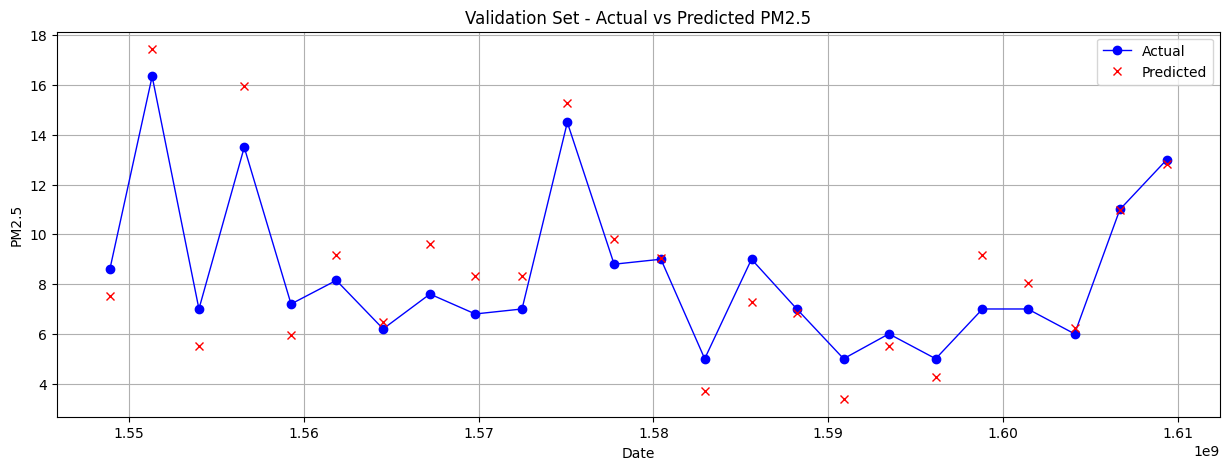

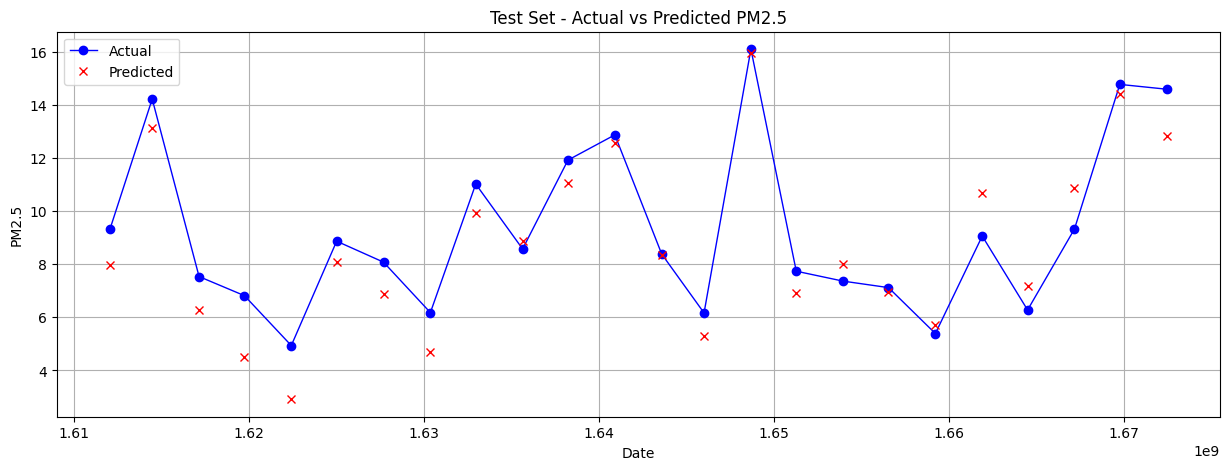

Model saved to svr_model_M.pkl


In [9]:
# Hourly
td.svr_train_and_evolve(df_hourly_ts)

# Daily
td.svr_train_and_evolve(df_daily_ts, 'D')

# Weekly
td.svr_train_and_evolve(df_weekly_ts, 'W')

# Monthly
td.svr_train_and_evolve(df_monthly_ts, 'M')


# Multiple Linear Regression

Training set size: 52588
Validation set size: 17529
Test set size: 17531
MAE: 2.2927
MSE: 12.6822
RMSE: 3.5612
MAPE: 0.3426
Bias: 1.0942
MASE: 2.211972548971861
MAE: 2.3551
MSE: 10.8163
RMSE: 3.2888
MAPE: 0.3231
Bias: 0.5076
MASE: 2.1803572595098593


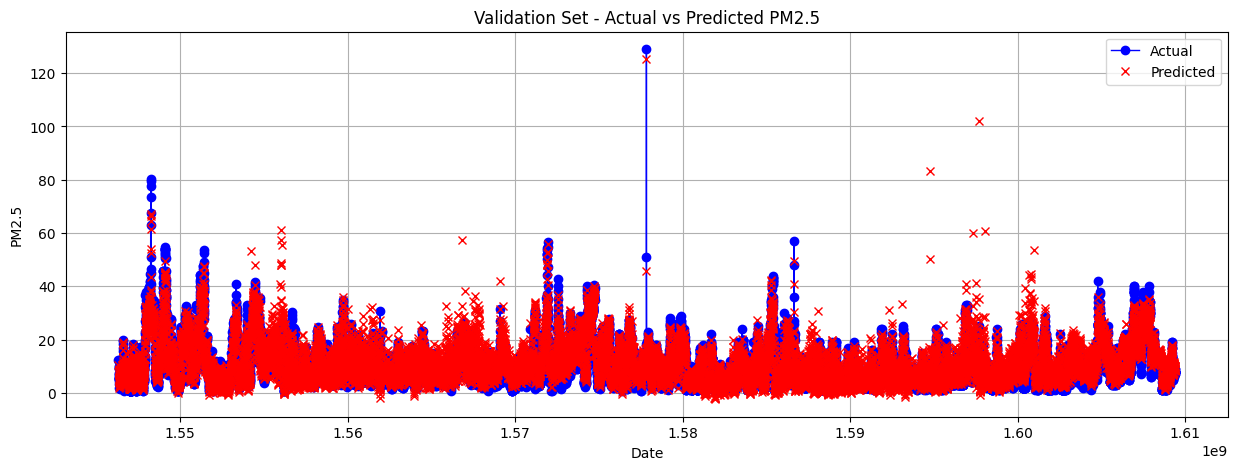

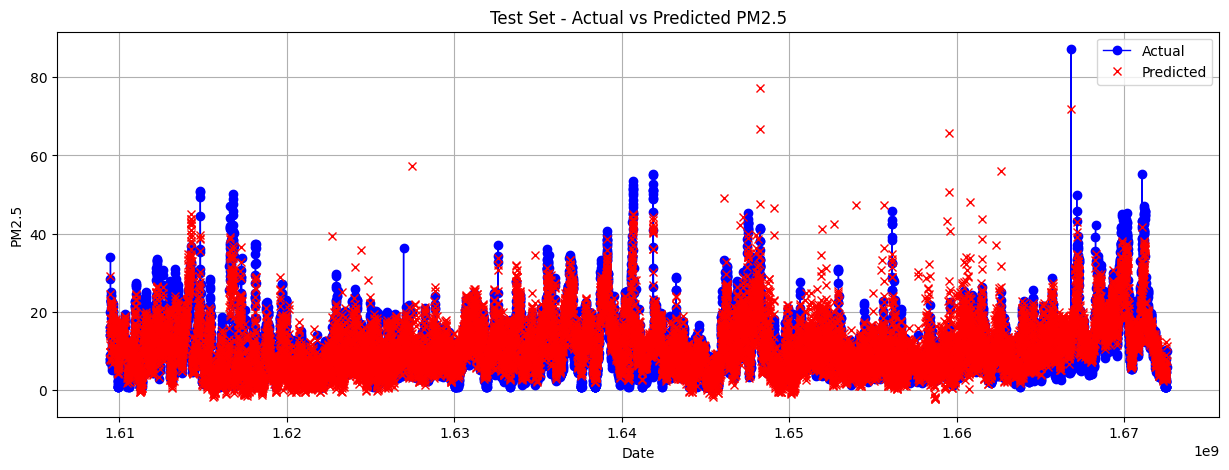

Model saved to mlr_model_H.pkl
Training set size: 2191
Validation set size: 730
Test set size: 731
MAE: 1.8842
MSE: 7.1928
RMSE: 2.6819
MAPE: 0.2628
Bias: 0.5297
MASE: 0.5231921943598435
MAE: 1.8912
MSE: 5.9756
RMSE: 2.4445
MAPE: 0.2462
Bias: 0.0434
MASE: 0.5393216211660924


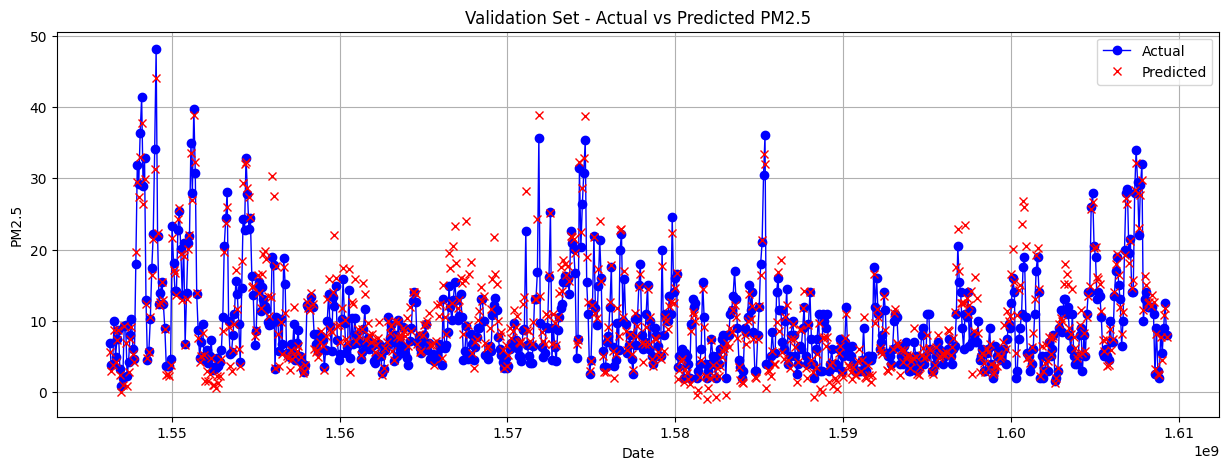

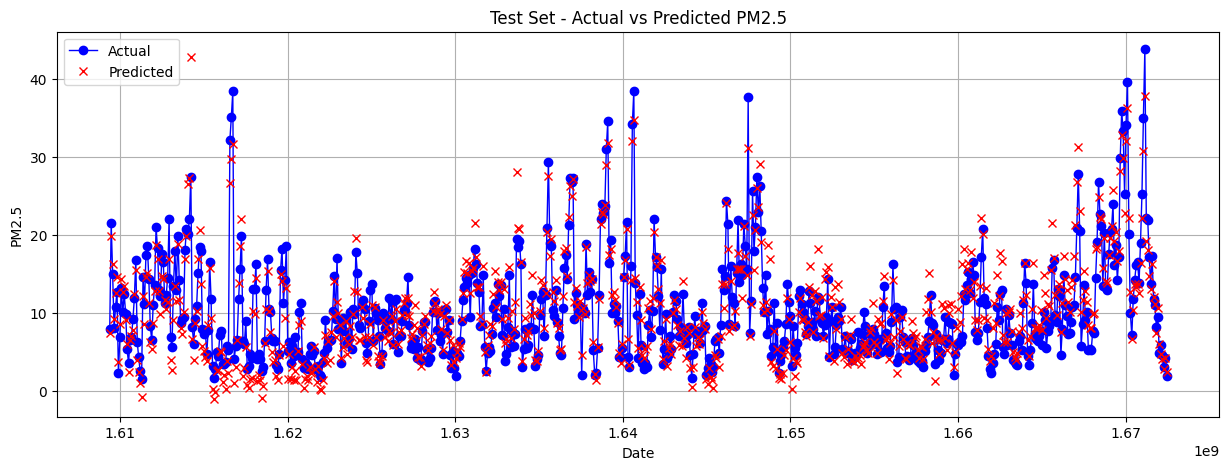

Model saved to mlr_model_D.pkl
Training set size: 313
Validation set size: 104
Test set size: 105
MAE: 1.5389
MSE: 4.4099
RMSE: 2.1000
MAPE: 0.1882
Bias: 0.1456
MASE: 0.3856477900195089
MAE: 1.3667
MSE: 3.1913
RMSE: 1.7864
MAPE: 0.1598
Bias: -0.4740
MASE: 0.3636436048934014


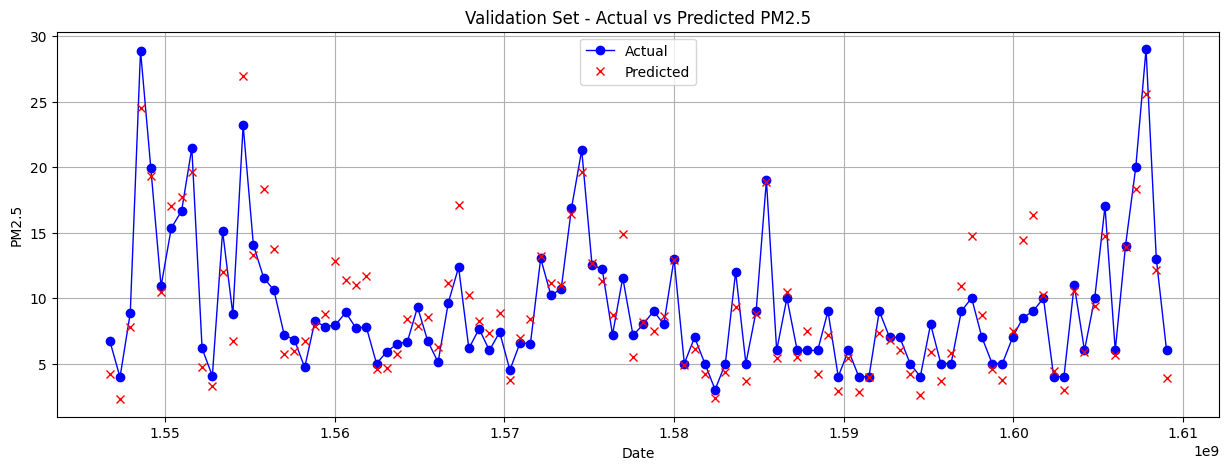

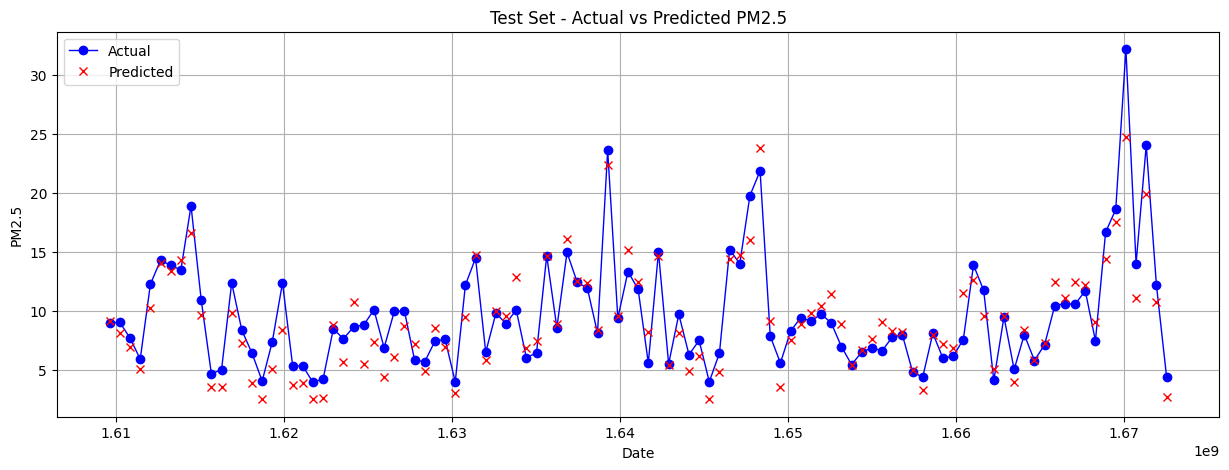

Model saved to mlr_model_W.pkl
Training set size: 72
Validation set size: 24
Test set size: 24
MAE: 1.1282
MSE: 1.7996
RMSE: 1.3415
MAPE: 0.1544
Bias: -0.1410
MASE: 0.35740715712938703
MAE: 1.2210
MSE: 2.0311
RMSE: 1.4252
MAPE: 0.1527
Bias: -0.8666
MASE: 0.37496708291550995


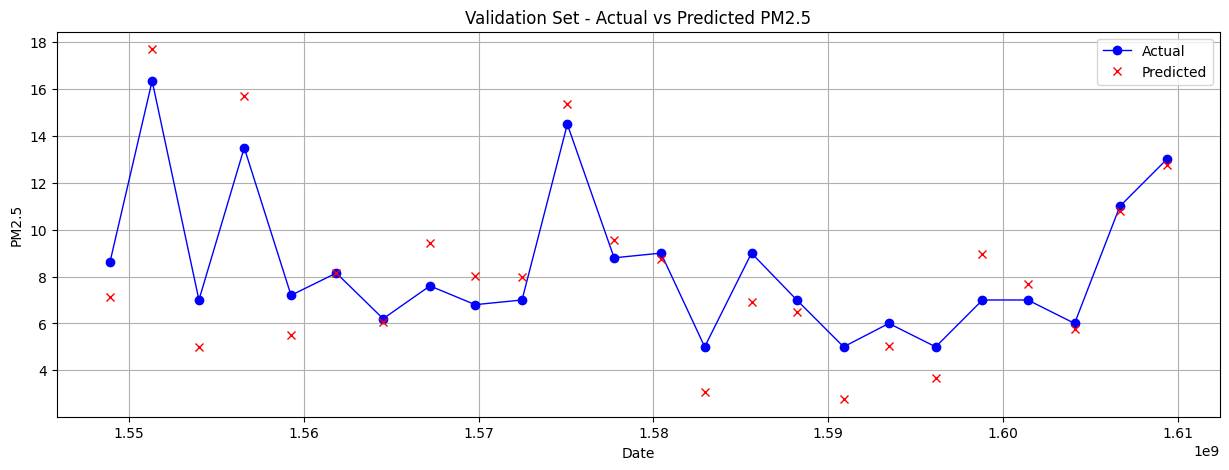

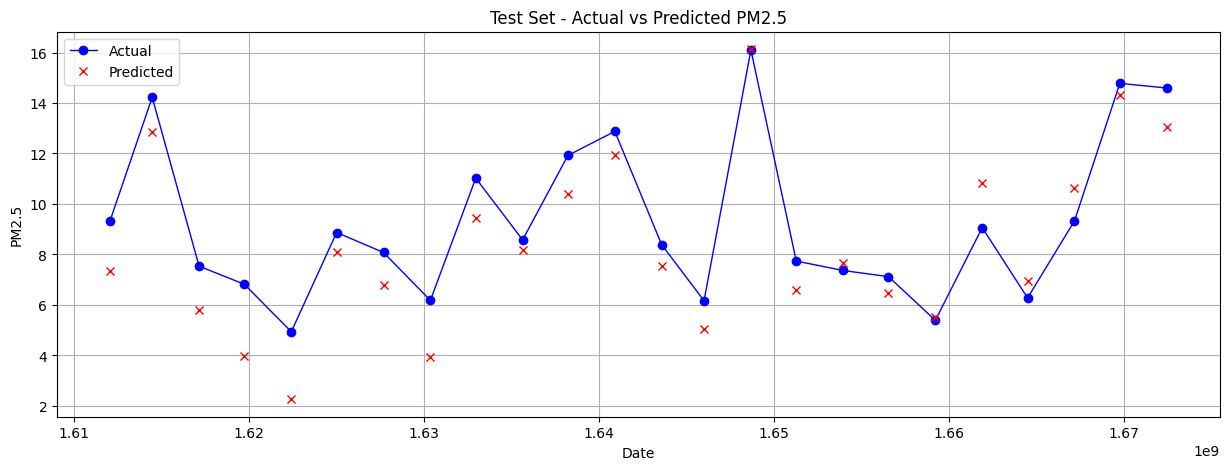

Model saved to mlr_model_M.pkl


In [10]:
# Hourly
td.linear_train_and_evolve(df_hourly_ts)

# Daily
td.linear_train_and_evolve(df_daily_ts, 'D')

# Weekly
td.linear_train_and_evolve(df_weekly_ts, 'W')

# Monthly
td.linear_train_and_evolve(df_monthly_ts, 'M')

# Hyperparamater Tuning

## HOURLY

In [11]:
# HOURLY HYPERPARAMETER TUNING

# hourly_sarimax_best_params = td.tune_sarimax(df_hourly)
# hourly_svr_best_params = td.svr_tune_and_evaluate(df_hourly_ts)

## DAILY

In [12]:
# DAILY HYPERPARAMETER TUNING

# daily_sarimax_best_params = td.tune_sarimax(df_daily)
# daily_svr_estimater_model = td.svr_tune_and_evaluate(df_daily_ts)

## WEEKLY

In [13]:
# WEEKLY HYPERPARAMETER TUNING

# weekly_sarimax_best_params = td.tune_sarimax(df_weekly)
# weekly_svr_best_params = td.svr_tune_and_evaluate(df_weekly_ts)

## MONTHLY

In [14]:
# MONTHLY HYPERPARAMETER TUNING

# monthly_sarimax_best_params = td.tune_sarimax(df_monthly)
# monthly_svr_best_params = td.svr_tune_and_evaluate(df_monthly_ts)